Nacitane data: 60000 trenovacich vzoriek, 10000 testovacich vzoriek
Ukazka trenovacich dat - nahodne vybrane rucne pisane cislice:


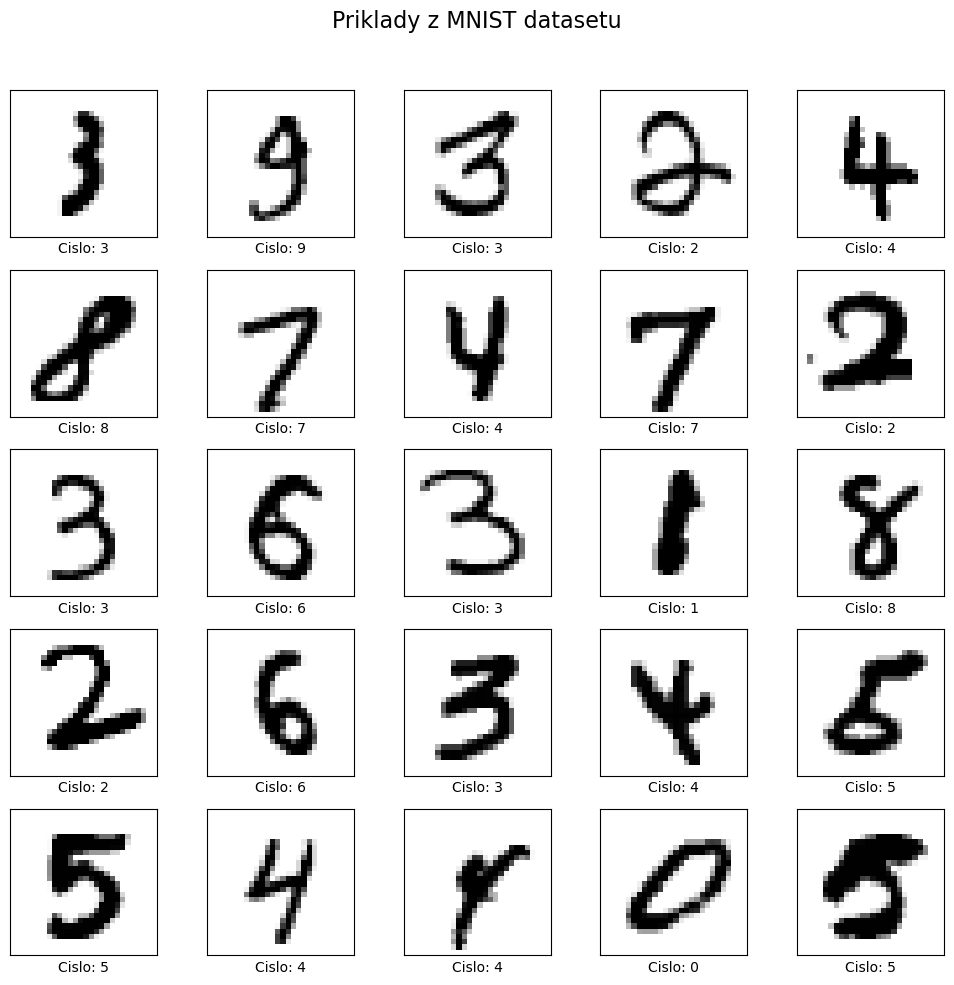


Struktura neuronovej siete:


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_41 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


=== Trenujem s optimizerom: adam, lr=0.001 ===
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8544 - loss: 0.4983 - val_accuracy: 0.9655 - val_loss: 0.1311
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9539 - loss: 0.1545 - val_accuracy: 0.9725 - val_loss: 0.0967
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.1118 - val_accuracy: 0.9777 - val_loss: 0.0778
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0889 - val_accuracy: 0.9757 - val_loss: 0.0787
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0774 - val_accuracy: 0.9803 - val_loss: 0.0701
Presnost na testovacich datach: 0.9772


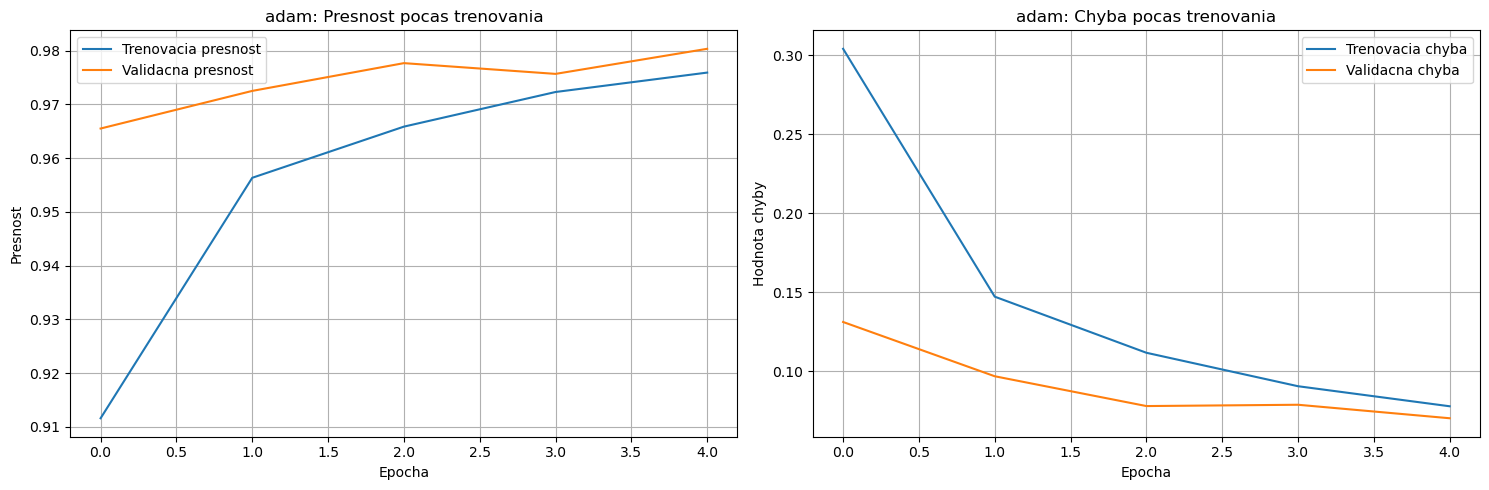

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


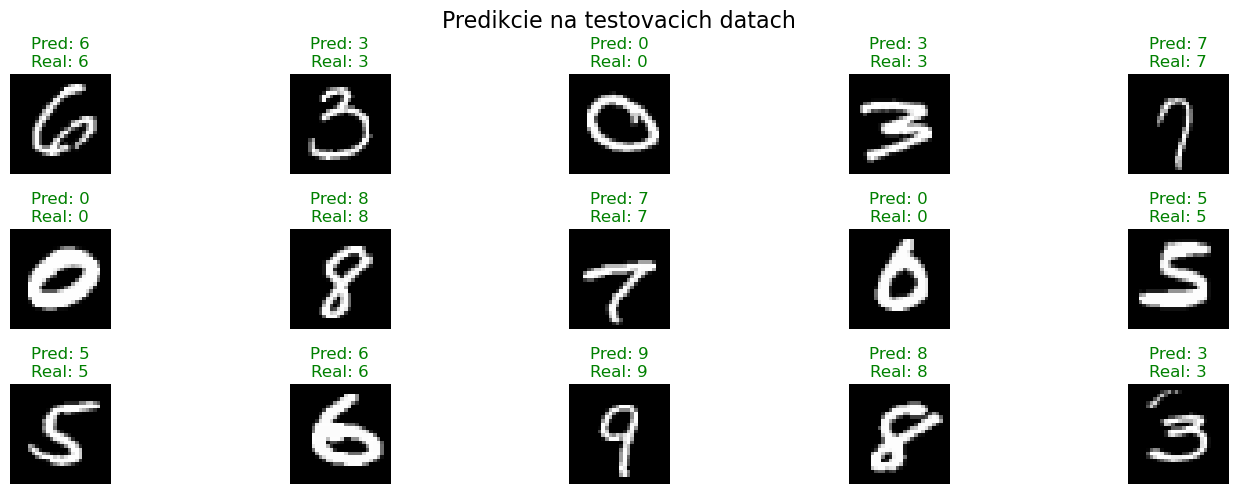

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


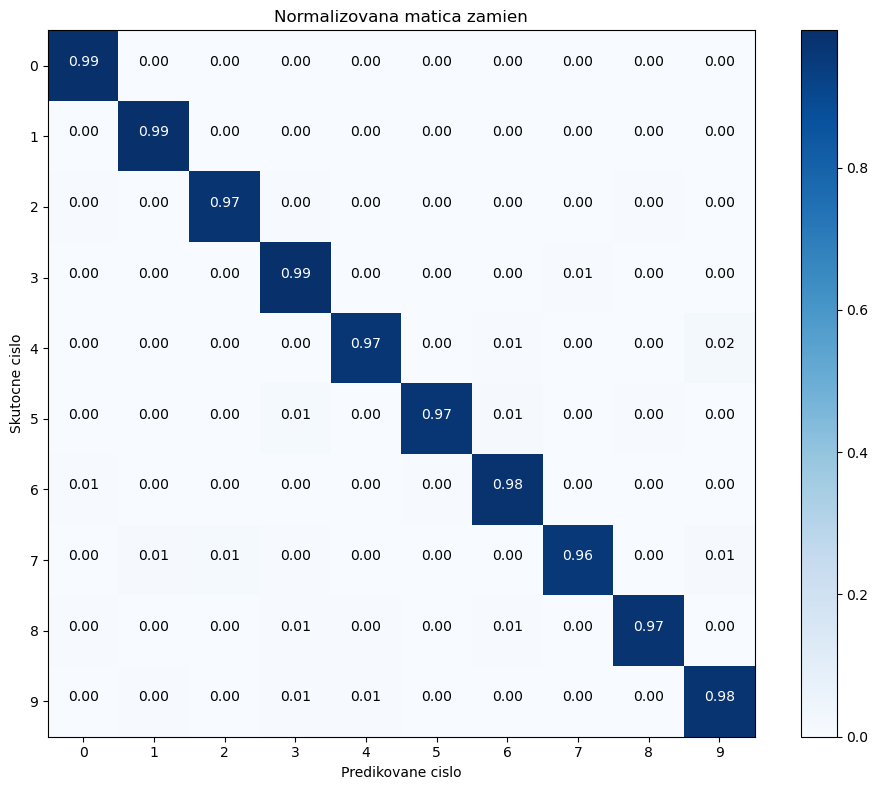

{'optimizer': 'adam',
 'learning_rate': 0.001,
 'epochs': 5,
 'training_time': 11.983288764953613,
 'test_accuracy': 0.9771999716758728,
 'test_loss': 0.07733004540205002,
 'history': {'accuracy': [0.9115926027297974,
   0.956333339214325,
   0.9658518433570862,
   0.9722962975502014,
   0.9759073853492737],
  'loss': [0.3041306734085083,
   0.14713050425052643,
   0.11160087585449219,
   0.09040651470422745,
   0.07770689576864243],
  'val_accuracy': [0.965499997138977,
   0.9725000262260437,
   0.9776666760444641,
   0.9756666421890259,
   0.9803333282470703],
  'val_loss': [0.13109281659126282,
   0.09671910852193832,
   0.0778411477804184,
   0.07866677641868591,
   0.07012025266885757]}}

In [26]:
#!pip install tensorflow matplotlib numpy keras

import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# ======================================================================================
# nacitanie dat
# ======================================================================================
# dataset MNIST (ze vraj to kazdy pouziva)
mnist = tf.keras.datasets.mnist

# nacitanie trenovacich a testovacich dat
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalizacia obrazkov (z 0-255 na 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Nacitane data: {train_images.shape[0]} trenovacich vzoriek, {test_images.shape[0]} testovacich vzoriek")

# ======================================================================================
# vizualizacia trenovacich dat
# ======================================================================================
def zobraz_trenovacie_data(images, labels, num_samples=25):
    """
    Zobrazi nahodne vybrane vzorky z trenovacich dat
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)
        plt.xlabel(f"Cislo: {labels[idx]}")
    plt.suptitle("Priklady z MNIST datasetu", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Zobrazime niekolko nahodnych obrazkov z trenovaciej mnoziny
print("Ukazka trenovacich dat - nahodne vybrane rucne pisane cislice:")
zobraz_trenovacie_data(train_images, train_labels)

# ======================================================================================
# definicia modelu neuronovej siete
# ======================================================================================
def vytvor_model():
    """Vytvori model bez varovania pomocou funkcionálneho API"""
    # Použitie funkcionálneho API namiesto Sequential pre odstránenie varovania
    inputs = tf.keras.Input(shape=(28, 28))
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = vytvor_model()

# zobrazenie struktury modelu
print("\nStruktura neuronovej siete:")
model.summary()

# ======================================================================================
# funkcia pre testovanie roznych optimizerov
# ======================================================================================
def trenuj_a_vyhodnot_optimizer(optimizer_name, learning_rate, epochs=5):
    """Trenuje model s danym optimizerom a vrati vysledky"""
    print(f"\n=== Trenujem s optimizerom: {optimizer_name}, lr={learning_rate} ===")
    
    # Vytvorime novy model
    model = vytvor_model()
    
    # Vyber optimizera
    if optimizer_name == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=0.0)
    elif optimizer_name == 'sgd_momentum':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'adamax':
        opt = Adamax(learning_rate=learning_rate)
    elif optimizer_name == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    elif optimizer_name == 'ftrl':
        opt = Ftrl(learning_rate=learning_rate)
    else:
        opt = 'adam'  # predvoleny
    
    # Kompilacia
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Cas zaciatku trenovania
    start_time = time.time()
    
    # Trenovanie
    history = model.fit(
        train_images, train_labels,
        epochs=epochs,
        validation_split=0.1,
        verbose=1
    )
    
    # Cas trenovania
    training_time = time.time() - start_time
    
    # Vyhodnotenie
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Presnost na testovacich datach: {test_accuracy:.4f}")
    
    # Grafy
    vykresli_historiu_treningu(history, optimizer_name)
    
    # Zobrazenie predikcii
    zobraz_predikcie(test_images, test_labels, model)
    
    # Zobrazenie matice zamien
    zobraz_maticu_zamien(model, test_images, test_labels)
    
    return {
        'optimizer': optimizer_name,
        'learning_rate': learning_rate,
        'epochs': epochs,
        'training_time': training_time,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'history': history.history
    }

# ======================================================================================
# vykreslenie grafu priebehu trenovania
# ======================================================================================
def vykresli_historiu_treningu(history, optimizer_name=''):
    """
    Zobrazi grafy presnosti a chyby pocas trenovania
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Graf presnosti
    ax1.plot(history.history['accuracy'], label='Trenovacia presnost')
    ax1.plot(history.history['val_accuracy'], label='Validacna presnost')
    title_prefix = f"{optimizer_name}: " if optimizer_name else ""
    ax1.set_title(f'{title_prefix}Presnost pocas trenovania')
    ax1.set_xlabel('Epocha')
    ax1.set_ylabel('Presnost')
    ax1.legend()
    ax1.grid(True)
    
    # Graf chyby (loss)
    ax2.plot(history.history['loss'], label='Trenovacia chyba')
    ax2.plot(history.history['val_loss'], label='Validacna chyba')
    ax2.set_title(f'{title_prefix}Chyba pocas trenovania')
    ax2.set_xlabel('Epocha')
    ax2.set_ylabel('Hodnota chyby')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# ======================================================================================
# vizualizacia predikcii na testovacich datach
# ======================================================================================
def zobraz_predikcie(images, true_labels, model, num_samples=15):
    """
    Zobrazi obrazky s predikovanu a skutocnou hodnotou
    """
    # Vyber nahodnych indexov
    indices = random.sample(range(len(images)), num_samples)
    
    # Ziskanie predikcii pre vybrane obrazky
    predictions = model.predict(images[indices])
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Zobrazenie obrazkov a predikcii
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis('off')
        
        # Farba textu zalezi od spravnosti predikcie
        color = 'green' if predicted_labels[i] == true_labels[idx] else 'red'
        plt.title(f"Pred: {predicted_labels[i]}\nReal: {true_labels[idx]}", color=color)
        
    plt.suptitle("Predikcie na testovacich datach", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# ======================================================================================
# vizualizacia matice zamien (confusion matrix)
# ======================================================================================
def zobraz_maticu_zamien(model, test_images, test_labels):
    """
    Zobrazi maticu zamien - ukazuje ako model klasifikuje jednotlive triedy
    """
    # Ziskat predikcie
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    
    # Vypocet matice zamien
    conf_matrix = tf.math.confusion_matrix(test_labels, pred_labels, num_classes=10)
    
    # Normalizacia matice pre lepsiu interpretaciu
    conf_matrix_norm = conf_matrix / conf_matrix.numpy().sum(axis=1, keepdims=True)
    
    # Zobrazenie matice
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Normalizovana matica zamien")
    plt.colorbar()
    
    # Popisky osi
    classes = [str(i) for i in range(10)]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predikovane cislo")
    plt.ylabel("Skutocne cislo")
    
    # Hodnoty v mriezke
    thresh = conf_matrix_norm.numpy().max() / 2.0
    for i in range(conf_matrix_norm.shape[0]):
        for j in range(conf_matrix_norm.shape[1]):
            plt.text(j, i, f"{conf_matrix_norm[i, j]:.2f}",
                    horizontalalignment="center",
                    color="white" if conf_matrix_norm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()

# ======================================================================================
# porovnanie optimizerov
# ======================================================================================
def porovnaj_optimizery():
    """Porovna rozne optimizery a zobrazi ich vysledky"""
    # Definicia optimizerov na testovanie
    optimizers_to_test = [
        ('sgd', 0.01),
        ('sgd_momentum', 0.01),
        ('adam', 0.001),
        ('rmsprop', 0.001),
        ('nadam', 0.001),
        ('ftrl', 0.001),
        ('adamax', 0.001)
    ]
    
    results = []
    for opt_name, lr in optimizers_to_test:
        result = trenuj_a_vyhodnot_optimizer(opt_name, lr, epochs=3)
        results.append(result)
    
    # Porovnanie vysledkov
    plt.figure(figsize=(12, 6))
    
    # Graf presnosti
    for result in results:
        plt.plot(result['history']['val_accuracy'], 
                 label=f"{result['optimizer']} (lr={result['learning_rate']}) - {result['test_accuracy']:.4f}")
    
    plt.title('Porovnanie optimizerov - validacna presnost')
    plt.xlabel('Epocha')
    plt.ylabel('Presnost')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Tabulka vysledkov
    print("\n=== Porovnanie optimizerov ===")
    print(f"{'Optimizer':<15} {'Learning Rate':<15} {'Test Accuracy':<15} {'Training Time':<15}")
    print("-" * 60)
    for result in results:
        print(f"{result['optimizer']:<15} {result['learning_rate']:<15.5f} {result['test_accuracy']:<15.4f} {result['training_time']:<15.2f}s")


# ======================================================================================
# hlavny program - vyber co chces spustit
# ======================================================================================

# Trening s jednym optimizerom
# moznosti: sgd sgd_momentum rmsprop adam adamax nadam ftrl
trenuj_a_vyhodnot_optimizer('adam', 0.001, epochs=5)

# Porovnanie viacerych optimizerov
#porovnaj_optimizery()

# ulozanie modelu 
# model.save('mnist_model.h5') 
# alebo SavedModel format
#model.save('mnist_model')  # ulozi priecinok s modelom